In [31]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import axes
import pickle
from datetime import datetime
from scipy import log,exp,sqrt,stats
print('Packages')

Packages


In [32]:
print('Loading data: h10, btc_data, cb_data ,c10_data, tmc_data')
coin_data = np.load('/Users/louisribieras/Desktop/IXPERIENCE/my_invictus/data/latest_coin_data.pkl')
h10_data = pd.read_csv('/Users/louisribieras/Desktop/Invictus/Data/h10_returns.csv')
btc_data = pd.read_csv('/Users/louisribieras/Desktop/Invictus/Data/btc_final')
cb_data = pd.read_csv('/Users/louisribieras/Desktop/Invictus/Data/Coinbase_Returns.csv')
c10_data = pd.read_csv('/Users/louisribieras/Desktop/Invictus/Data/final_C10')
tmc_data = pd.read_csv('/Users/louisribieras/Desktop/Invictus/Data/total_market_cap_final.csv')

Loading data: h10, btc_data, cb_data ,c10_data, tmc_data


In [33]:
# Reordering column index
coin_data2 = coin_data[coin_data.columns[::-1]]
# original date index
data_index = coin_data2.columns[::7]
data_index2 = data_index[26::]

# Reindexing DataFrames
h10_data.index = data_index2
btc_data.index = data_index2
cb_data.index = cb_data['Unnamed: 0']
c10_data.index = data_index2
tmc_data.index = data_index2

In [34]:
# Dropping redundant column
h10_data = h10_data.drop('Unnamed: 0',axis = 1)
btc_data = btc_data.drop('Unnamed: 0',axis = 1)
cb_data = cb_data.drop('Unnamed: 0', axis =1)
c10_data = c10_data.drop('Unnamed: 0',axis = 1)
tmc_data = tmc_data.drop('Unnamed: 0',axis = 1)

In [35]:
print('H10 Data')
h10_data.head(5)

H10 Data


,Cum_Simple_Returns,H10 Log
"Jul 01, 2016",1.000000,0.007937
"Jul 08, 2016",0.997753,0.004546
"Jul 15, 2016",1.002341,-0.016410
"Jul 22, 2016",1.047137,0.007901
"Jul 29, 2016",1.035987,0.126894


In [36]:
print('Bitcoin Data')
btc_data.head(5)

Bitcoin Data


,weekly returns,cumulative returns
"Jul 01, 2016",NaN,1.000000
"Jul 08, 2016",-0.014461,0.985539
"Jul 15, 2016",-0.004906,0.980704
"Jul 22, 2016",-0.019043,0.962029
"Jul 29, 2016",0.009791,0.971448


In [37]:
print('CB Data')
cb_data.head(5)

CB Data


,weekly_returns,cum_returns
Unnamed: 0,,
"Jul 01, 2016",NaN,1.000000
"Jul 08, 2016",0.005394,1.005394
"Jul 15, 2016",-0.009707,0.995634
"Jul 22, 2016",0.021367,1.016908
"Jul 29, 2016",-0.010442,1.006289


In [38]:
print('C10 Data')
c10_data.head(5)

C10 Data


,weekly_simple_returns,cumulative_returns
"Jul 01, 2016",NaN,1.000000
"Jul 08, 2016",-0.047639,0.952361
"Jul 15, 2016",0.006550,0.958599
"Jul 22, 2016",-0.003303,0.955433
"Jul 29, 2016",-0.036450,0.920607


In [39]:
print('Total Market Caps Data')
tmc_data.head(5)

Total Market Caps Data


,weekly change,cumulative change
"Jul 01, 2016",NaN,1.000000
"Jul 08, 2016",-0.057749,0.942251
"Jul 15, 2016",0.038748,0.978761
"Jul 22, 2016",0.016881,0.995284
"Jul 29, 2016",-0.013492,0.981856


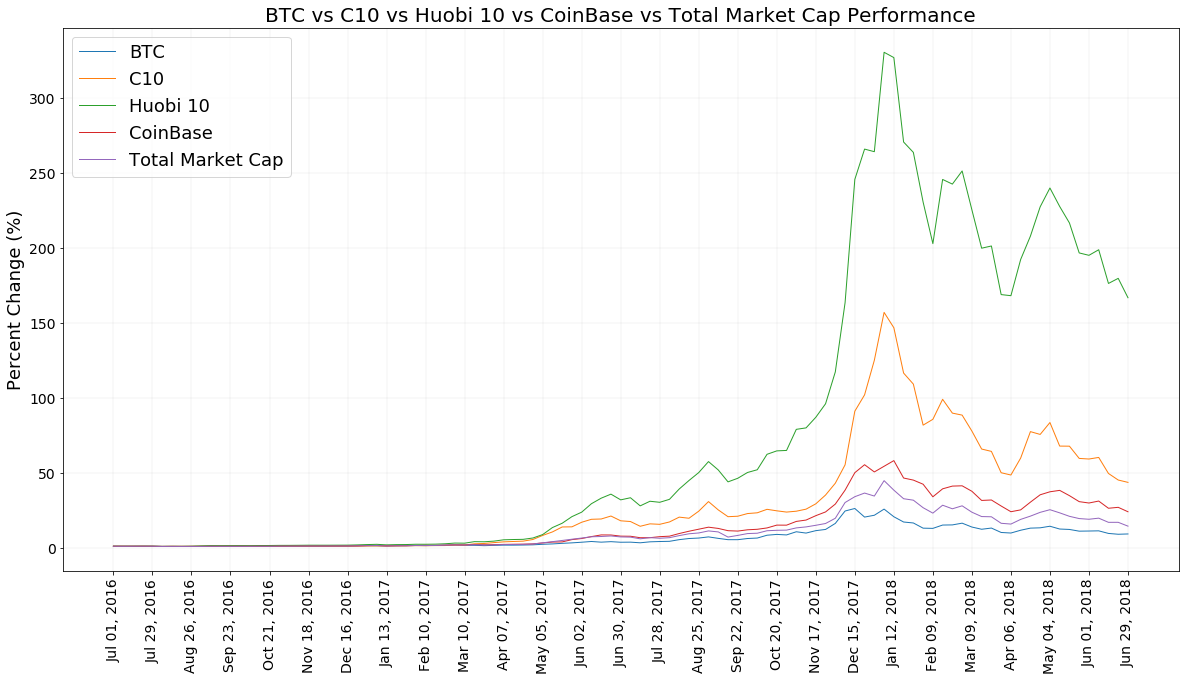

In [42]:
plt.plot(btc_data['cumulative returns'], linewidth = 1)
plt.plot(c10_data['cumulative_returns'], linewidth = 1)
plt.plot(h10_data['Cum_Simple_Returns'], linewidth = 1)
plt.plot(cb_data['cum_returns'], linewidth = 1)
plt.plot(tmc_data['cumulative change'], linewidth = 1)
plt.legend(['BTC','C10','Huobi 10','CoinBase','Total Market Cap'], fontsize = 18)
plt.title('BTC vs C10 vs Huobi 10 vs CoinBase vs Total Market Cap Performance', fontsize = 20)
plt.ylabel('Percent Change (%)', fontsize = 18)
plt.plot()
# plt.axhline(0, color='red', linewidth = 0.5)
# plt.title('', fontsize = 18)
plt.rcParams['figure.figsize'] = (20,10)
plt.grid(color='black', linestyle='-', linewidth=0.05)
plt.xticks(data_index2[0:105:4], rotation=90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()